# Instructor Do: Sharpe Ratios

### Import Libraries and Dependencies

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

%matplotlib inline

### Read Data

In [2]:
portfolio_a_path = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 3\3\10-Ins_Sharpe_Ratios\Resources\tech_stocks_2018_a.csv")
portfolio_b_path = Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 3\3\10-Ins_Sharpe_Ratios\Resources\tech_stocks_2018_b.csv")
riskfreerate_path= Path(r"C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 3\3\10-Ins_Sharpe_Ratios\Resources\risk_free_rate.csv")

portfolio_a = pd.read_csv(portfolio_a_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
portfolio_b = pd.read_csv(portfolio_b_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
risk_free_rate = pd.read_csv(riskfreerate_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

### Display Sample Data

In [3]:
portfolio_a.head()

,AAPL,MSFT,GOOG,FB,AMZN
Date,,,,,
2019-08-23,202.64,133.39,1151.29,177.75,1749.62
2019-08-22,212.46,137.78,1189.53,182.04,1805.60
2019-08-21,212.64,138.79,1191.25,183.55,1823.54
2019-08-20,210.36,137.26,1182.69,183.81,1801.38
2019-08-19,210.35,138.41,1198.45,186.17,1816.12


In [4]:
portfolio_b.head()

,SNE,AMD,TWTR,IBM,MU
Date,,,,,
2019-08-23,202.64,133.39,1151.29,177.75,42.96
2019-08-22,54.77,31.90,42.18,134.32,44.78
2019-08-21,56.65,31.70,42.80,134.25,44.17
2019-08-20,55.66,30.72,42.29,133.00,44.23
2019-08-19,55.72,31.48,41.70,135.04,45.01


### Calculate Annualized Std Dev

In [5]:
# Calculate daily returns
daily_ret_portA = portfolio_a.pct_change().dropna().copy()
daily_ret_portB = portfolio_b.pct_change().dropna().copy()

In [6]:
daily_ret_portA

,AAPL,MSFT,GOOG,FB,AMZN
Date,,,,,
2019-08-22,0.048460,0.032911,0.033215,0.024135,0.031996
2019-08-21,0.000847,0.007331,0.001446,0.008295,0.009936
2019-08-20,-0.010722,-0.011024,-0.007186,0.001417,-0.012152
2019-08-19,-0.000048,0.008378,0.013326,0.012839,0.008183
2019-08-16,-0.018303,-0.016473,-0.017397,-0.013267,-0.012967
...,...,...,...,...,...
2018-08-28,-0.014710,-0.015711,-0.014528,0.002047,-0.032671
2018-08-27,-0.008011,-0.005986,0.008667,0.006808,-0.002659
2018-08-24,-0.008167,-0.010949,-0.017048,-0.015863,-0.011563


In [7]:
daily_ret_portB

,SNE,AMD,TWTR,IBM,MU
Date,,,,,
2019-08-22,-0.729718,-0.760852,-0.963363,-0.244332,0.042365
2019-08-21,0.034325,-0.006270,0.014699,-0.000521,-0.013622
2019-08-20,-0.017476,-0.030915,-0.011916,-0.009311,0.001358
2019-08-19,0.001078,0.024740,-0.013951,0.015338,0.017635
2019-08-16,0.000179,-0.009530,-0.026859,-0.009479,-0.032437
...,...,...,...,...,...
2018-08-28,-0.022779,-0.005952,0.003960,-0.006439,0.009840
2018-08-27,0.004483,0.008383,0.011271,0.000682,-0.005159
2018-08-24,-0.026419,-0.050673,-0.044859,-0.004431,-0.026311


In [11]:
# Concatenate returns and risk-free rate into one DataFrame
combined_df = pd.concat([daily_ret_portA, daily_ret_portB, risk_free_rate], axis='columns', join='inner')
combined_df

,AAPL,MSFT,GOOG,FB,AMZN,SNE,AMD,TWTR,IBM,MU,rf_rate
Date,,,,,,,,,,,
2019-08-22,0.048460,0.032911,0.033215,0.024135,0.031996,-0.729718,-0.760852,-0.963363,-0.244332,0.042365,0.000218
2019-08-21,0.000847,0.007331,0.001446,0.008295,0.009936,0.034325,-0.006270,0.014699,-0.000521,-0.013622,0.000214
2019-08-20,-0.010722,-0.011024,-0.007186,0.001417,-0.012152,-0.017476,-0.030915,-0.011916,-0.009311,0.001358,0.000211
2019-08-19,-0.000048,0.008378,0.013326,0.012839,0.008183,0.001078,0.024740,-0.013951,0.015338,0.017635,0.000211
2019-08-16,-0.018303,-0.016473,-0.017397,-0.013267,-0.012967,0.000179,-0.009530,-0.026859,-0.009479,-0.032437,0.000203
...,...,...,...,...,...,...,...,...,...,...,...
2018-08-28,-0.014710,-0.015711,-0.014528,0.002047,-0.032671,-0.022779,-0.005952,0.003960,-0.006439,0.009840,0.000232
2018-08-27,-0.008011,-0.005986,0.008667,0.006808,-0.002659,0.004483,0.008383,0.011271,0.000682,-0.005159,0.000231
2018-08-24,-0.008167,-0.010949,-0.017048,-0.015863,-0.011563,-0.026419,-0.050673,-0.044859,-0.004431,-0.026311,0.000228


In [12]:
# Calculate Sharpe Ratio
sharpe_ratio = ((combined_df.mean() - combined_df['rf_rate'].mean())*252) / (combined_df.std() * np.sqrt(252))
sharpe_ratio

AAPL       0.161304
MSFT      -0.872791
GOOG       0.054654
FB        -0.068155
AMZN       0.239453
SNE       -0.930438
AMD       -0.923004
TWTR      -1.026140
IBM       -0.598469
MU         0.419254
rf_rate    0.000000
dtype: float64

### Plot sharpe ratios

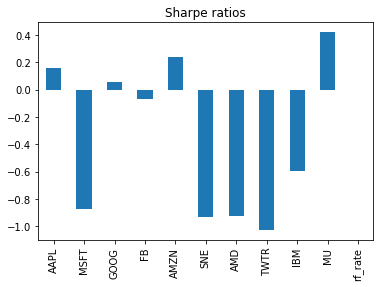

In [15]:
# Plot sharpe ratios
sharpe_ratio.plot(kind='bar', title='Sharpe ratios')